In [1]:
from IPython.core.interactiveshell import InteractiveShell
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import numpy as np

# Data Visualization With Python 

<!-- PELICAN_BEGIN_SUMMARY -->

Data visualizations and static or interactive visualizations are one of the data analysis tools to helping identify outliers
or data transformations and ideals for financial models.

The example file "1960-2017 world population and life expectancy by country" is from https://data.worldbank.org/indicator/SP.POP.TOTL and https://data.worldbank.org/indicator/SP.DYN.LE00.IN. 
The file is in Excel format with two tabs.

The maximum number of data series per chart in Excel is 255, so using Python to chart a huge dataset is very useful.

<!-- PELICAN_END_SUMMARY -->

## Use Python to read Excel file into SQLite and plot visualization chart for Financial Analysis 
- Convert Excel file in SQLite database 
- Set index
- Join Tables and Query Data in Python 
- Reading results into a pandas DataFrame
- Create query result table in SQLite and Excel
- Creating and altering tables with pandas
- Modifying primary key in SQLite or in Python
- Visualize popluation and life expectancy comparison between US and Japan from 1960 to 2017

### Convert Excel to SQLite Database
- Connect SQlite file
- Changes make in Excel, will automatically update in SQLite after reconnect
- This is very helpful, no need to save and reopen Excel file

In [3]:
# Read excel file "PopLife.xlsx" into SQlite
filename="data/PopLife" 
con=sqlite3.connect(filename+".db")  

wb=pd.read_excel(filename+'.xlsx',sheet_name=None)
for sheet in wb:
    wb[sheet].to_sql(sheet,con, index=False, if_exists='replace')
   
con.commit()
#con.close()

### Set index
- Set primary key for tables "Pop" and "Life" in SQLite
- The benefit of SQlite is we can set up unique identifer as primay key

In [5]:
# Read the first tab and set index
population = pd.read_sql('select * from Pop', con, index_col="CountryName")
print("There are %s countries - here are the first 5:" % (population.shape[0])) 
population.head()

There are 264 countries - here are the first 5:


,CountryCode,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
CountryName,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
Afghanistan,AFG,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,10604346.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
Angola,AGO,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,6523791.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
Albania,ALB,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
Andorra,AND,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


In [21]:
# Read the second tab and set index
life = pd.read_sql('select * from Life', con, index_col="CountryName")
life.head()

,CountryCode,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
CountryName,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,65.662,66.074,66.444,66.787,67.113,67.435,67.762,68.095,68.436,...,74.725,74.872,75.016,75.158,75.299,75.440,75.582,75.725,75.867,None
Afghanistan,AFG,32.292,32.742,33.185,33.624,34.060,34.495,34.928,35.361,35.796,...,60.243,60.754,61.226,61.666,62.086,62.494,62.895,63.288,63.673,None
Angola,AGO,33.251,33.573,33.914,34.272,34.645,35.031,35.426,35.828,36.234,...,56.189,57.231,58.192,59.042,59.770,60.373,60.858,61.241,61.547,None
Albania,ALB,62.279,63.298,64.187,64.911,65.461,65.848,66.108,66.302,66.485,...,75.943,76.281,76.652,77.031,77.389,77.702,77.963,78.174,78.345,None
Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


### Join Tables in Python then reading results into a pandas dataFrame
- Join tables and save the result to a third table in SQLite
- We can save the third table as Excel too

In [54]:
# Merge both tabs - Population and Life Expectancy
df_pop = pd.read_excel('data/PopLife.xlsx', sheet_name = "Pop") 
df_life = pd.read_excel('data/PopLife.xlsx', sheet_name = "Life") 
df_merge = pd.merge(df_pop, df_life, on='CountryName')
print("There are %s policies with incurred losses - here are the first 5:" % (df_merge.shape[0]))  
df_merge.head(5)

There are 264 policies with incurred losses - here are the first 5:


,CountryName,CountryCode_x,1960_x,1961_x,1962_x,1963_x,1964_x,1965_x,1966_x,1967_x,...,2008_y,2009_y,2010_y,2011_y,2012_y,2013_y,2014_y,2015_y,2016_y,2017_y
0,Aruba,ABW,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,...,74.725,74.872,75.016,75.158,75.299,75.440,75.582,75.725,75.867,NaN
1,Afghanistan,AFG,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,...,60.243,60.754,61.226,61.666,62.086,62.494,62.895,63.288,63.673,NaN
2,Angola,AGO,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,...,56.189,57.231,58.192,59.042,59.770,60.373,60.858,61.241,61.547,NaN
3,Albania,ALB,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,...,75.943,76.281,76.652,77.031,77.389,77.702,77.963,78.174,78.345,NaN
4,Andorra,AND,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Save merge result as Excel file
df_merge.to_excel('data/PopLifeMergeExcel.xlsx') 

In [57]:
# Save merge result as SQL file
df_merge.to_sql("PopLifeMergeSQL",con, if_exists='replace')
con.commit()
#con.close()

### Here is table view from DB Browser 
<img src="/images/MergeSQL.png" alt="[img: testing DB Browser after merging the result to new table]" title="DbBrowser Merge" />


In [46]:
# Inserting and updating column to the SQlite data ??
# Connecting to the database file
# https://sebastianraschka.com/Articles/2014_sqlite_in_python_tutorial.html
conn = sqlite3.connect("data/PopLife.db")
c = conn.cursor()

c.execute("ALTER TABLE {tn} ADD COLUMN '{cn}' {ct}"\
        .format(tn=table_name, cn=new_column1, ct=column_type))

NameError: name 'table_name' is not defined

In [ ]:
# Creating unique indexes -- ???

### Visualize the data  - compare US and Japan life Expectany from 1960 to 2015
- After initial data analysis, sometime we need to reshape the data for further analaysis
- We can reshape the data format to set index for visualization
- The maximum number of data series per chart in Excel is 255, this data has 264 columns as data series

In [7]:
dfr = pd.read_excel('data/LifeChart.xlsx')
year = dfr['Date']
country = dfr.loc[:,'Aruba':'Zimbabwe']  #how to select US and Japan only???? 5/24/18
print (country[0:2])

       Aruba  Afghanistan     Angola    Albania  Andorra  Arab World  \
0  65.569366    32.337561  33.226024  62.254366      NaN   46.815045   
1  65.988024    32.786976  33.547756  63.273463      NaN   47.397232   

   United Arab Emirates  Argentina    Armenia  American Samoa    ...      \
0             52.288707  65.215537  65.863463             NaN    ...       
1             53.334049  65.338512  66.284390             NaN    ...       

   Virgin Islands (U.S.)    Vietnam    Vanuatu      World      Samoa  Kosovo  \
0              66.224854  59.067024  46.487488  52.585685  49.969512     NaN   
1              66.487976  59.744195  47.088098  53.089030  50.469512     NaN   

   Yemen, Rep.  South Africa     Zambia   Zimbabwe  
0    34.363805     52.226244  45.109805  51.541976  
1    34.473244     52.568732  45.487512  51.914951  

[2 rows x 264 columns]


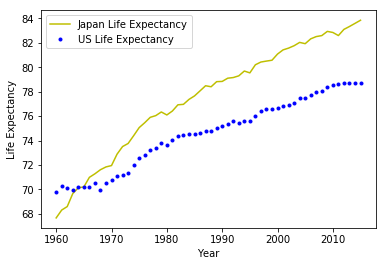

In [8]:
# Compare Japan and US life Expectancy from 1960 to 2015 and save the chart as png file, then use the chart for analysis or presentation
# It's effective to chart the dataset when dealing with huge dataset more than Excel limite 255 data series
plt.figure(1)
plt.plot(year, country['Japan'], 'y-')
plt.plot(year, country['United_States'], 'b.')
plt.legend(['Japan Life Expectancy','US Life Expectancy'])
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.savefig('data/JapanLifeExpectancy.png')

### Plot USA and Japan Population Growth Comparision
- The example file is 1960-2017 population
- Plot population in million
- Plot population growth rate

In [9]:
data = pd.read_excel('data/USALife.xlsx')
data[data.Country == 'USA']
us = data[data.Country == 'USA']
japan = data[data.Country == 'Japan']

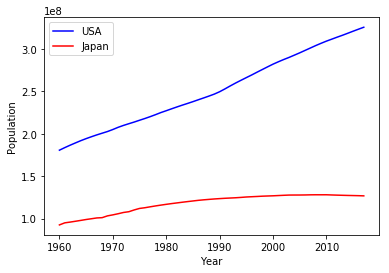

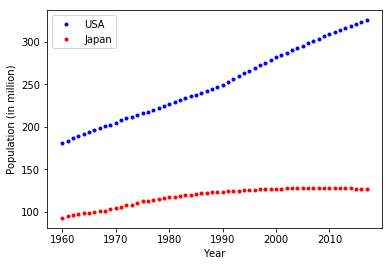

In [61]:
# First plot with the top left corner showing le8 - scientific notation, the number is too big
plt.plot(us.Year, us.Population, 'b')
plt.plot(japan.Year, japan.Population, 'r')
plt.legend(['USA', 'Japan'])
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()

# Plot in million and now we use dot plot
plt.plot(us.Year, us.Population / 10**6, 'b.')
plt.plot(japan.Year, japan.Population / 10**6, 'r.')
plt.legend(['USA', 'Japan'])
plt.xlabel('Year')
plt.ylabel('Population (in million)')
plt.show()

### Plot population growth rate - visiualize the growth, Japan population growth rate is starting to be lower than USA from mid-1980
 - Take the first year 1960 as first year, then divide to the following year for growth rate

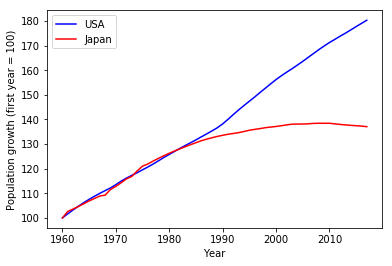

In [13]:
plt.plot(us.Year, us.Population / us.Population.iloc[0] * 100, 'b')
plt.plot(japan.Year, japan.Population / japan.Population.iloc[0] * 100, 'r')
plt.legend(['USA', 'Japan'])
plt.xlabel('Year')
plt.ylabel('Population growth (first year = 100)')
plt.show()